### Primeiro Desafio da 3º Imerssão de Dados Alura 

Para esse desafio estou utilizando o dataset *dados_experimentos.zip* disponbilizado durante a imersão de dados. O dataset contém dados de experimentos biogenéticos que foi proposto pela [Vanessa Leiko](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/) como material de apoio para essa imersão.

Cada linha deste dataset contém os experimentos realizados, onde pode ser observado na coluna **Tratamento** que alguns dos experimentos houve a exposição a droga e por determinado tempo conforme descreve a coluna **tempo**.

Durante o experimentos houve diferentes dosagens e utilizado várias amostras de drogas conforme nota-se na coluna **composto**.

Cada linha representa uma cultura de célula que foi exposta ao experimento, sendo submetido há algum tipo de droga para tal dosagem.


Criado por Leniel dos Santos
Adicione no [linkedin](https://www.linkedin.com/in/leniel-dos-santos-7813a924/)

In [9]:
# carregar as bibliotecas de sempre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Vamos carregar o dadaset de experimentos
df = pd.read_csv('dados_experimentos.zip', compression='zip')


In [3]:
"""
Preciso obter algumas informações gerais do dataframe e para isso vou usar a função describe() da biblioteca Pandas. A função describe é bastante interessante porque ela nos retorna algumas informações estatística 
que por si só já nos da uma boa visão de como estão distribuído os dados no nosso dataframe, por exemplo: mediana, média desvio padrão, quartil e outras informações impor antes.
"""
df.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [4]:
df.rename(columns={'droga': 'composto'}, inplace=True)

In [5]:
# O dataset contem **23814 istâncias** e **877 features** 
df.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'composto', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

### Desafio 01: Investigar por que a classe tratamento é tão desbalanceada

In [6]:
df['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [ ]:
Como o foco do experimento é desenvolver uma droga para tratamento biológico, os experimentos se concentram no uso da droga em desenvolvimento com isso criado uma espécie de viés sobre os dados da população.

### Desafio 02: Plotar as 5 últimas linhas da tabela

In [7]:
df.tail()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### Desafio 03: Proporção das classes tratamento

In [8]:

df['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Obsevando as informações acima é possível notar o quanto esta desbalanceado os dados da coluna **Tratamento**. Da nossa população **92%** estão categorizados como *com droga* do outro lado **0.08%** estão categorizados como *com controle*.

### Desafio 04: Quantas tipos de drogas foram investigados.

In [14]:

len(df['droga'].unique())

3289

Para essa população ao realizar o experimento foram utilizadas **3289** amostras diferentes de drogas combinadas em diversos cenários.  

### Desafio 06: Renomear as colunas tirando o hífen.

In [67]:

df.columns = [coluna.replace('-', '') for coluna in df.columns]
df.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

Algumas das colunas estão nomeadas com a presença de hífen. Queremo remover a presença de hífen e padronizar as nomenclaturas de cada coluna.

### Desafio 05: Procurar na documentação o método query(pandas).

In [71]:

dados_filtrados = df.query('g0 > 0')
dados_filtrados.head()


,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


Da população de experimentos estamos selecionando apenas aqueles que correspondem a condição do filtro [Query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html?highlight=query#pandas.DataFrame.query).

O método **Query** recupera do *DataFrame* as linhas que combinarem com a expressão a partir do filtro por coluna.


### Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)

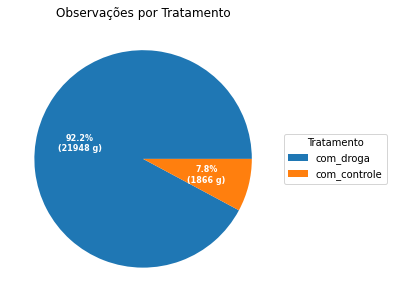

In [90]:

pizza, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))

dados = df.tratamento.value_counts()


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(dados.values, autopct=lambda pct: func(pct, dados.values), textprops=dict(color="w"))

ax.legend(wedges, dados.index,
          title="Tratamento",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Observações por Tratamento")
plt.show()


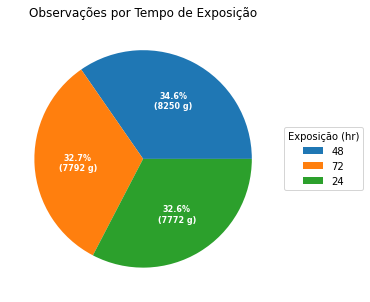

In [92]:
pizza, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))
dados = df.tempo.value_counts()

wedges, texts, autotexts = ax.pie(dados.values, autopct=lambda pct: func(pct, dados.values), textprops=dict(color="w"))

ax.legend(wedges, dados.index,
          title="Exposição (hr)",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Observações por Tempo de Exposição")
plt.show()


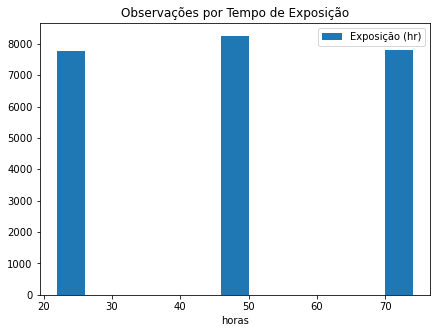

In [107]:
dados = df.tempo.value_counts()

barra, ax = plt.subplots(figsize=(7, 5))

ax.bar(dados.index, dados.values, 4, label='Exposição (hr)')

ax.set_xlabel('horas')
ax.set_title('Observações por Tempo de Exposição')
ax.legend()

plt.show()


### Desafio 08: Resumo do que você aprendeu com os dados


A partir da EDA foi possível entender os tratamentos utilizados nesse experimento e o tempo de exposição aplicado. O principal objetivo deste experimento é desenvolver uma droga para tratamento biológico e desta forma os experimentos se concentram no uso da droga, categorizando a coluna **Tratamento** como *com_drogas*.